In [128]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import signal
from scipy import misc
from scipy import ndimage

In [135]:
def noisy(noise_typ,image, mean=0, var=0.1):
    if noise_typ == "gauss":
        row,col= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col))
        gauss = gauss.reshape(row,col)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ =="speckle":
        row,col = image.shape
        gauss = np.random.randn(row,col)
        gauss = gauss.reshape(row,col)        
        noisy = image + image * gauss
        return noisy

In [136]:
image = cv2.imread("butterfly.jpg")


#  1 задание

c:\users\computar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
c:\users\computar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


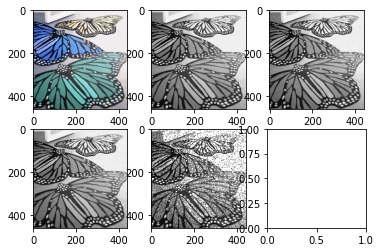

In [137]:
fig, ax = plt.subplots(2,3)
ax[0][0].imshow(image)
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ax[0][1].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
image_gray = noisy("s&p", image_gray)
ax[0][2].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
image_gray = noisy("gauss", image_gray)
ax[1][0].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
image_gray = noisy("speckle", image_gray)
ax[1][1].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
plt.show()

# 2 задание

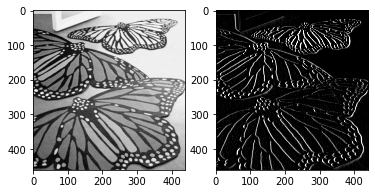

In [138]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
h = np.array([[1, 1, 1],[1, -2, 1],[-1, -1, -1]])
h = h.transpose()
grad = signal.convolve2d(image_gray, h, boundary='symm', mode='same')
fig, ax = plt.subplots(1,2)
ax[0].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(grad, cmap='gray', vmin=0, vmax=255)
plt.show()


# 3 задание


c:\users\computar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
c:\users\computar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


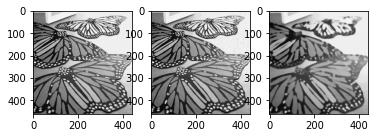

In [139]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(1,3)
ax[0].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
image_gray = noisy("s&p", image_gray)
ax[1].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
grad = ndimage.median_filter(image_gray, size=10)
ax[2].imshow(grad, cmap='gray', vmin=0, vmax=255)
plt.show()

# 4 задание

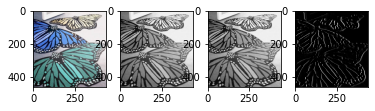

In [143]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(1,4)
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
image_gray = noisy("gauss", image_gray, mean=0, var=0.02)
ax[2].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
grad = ndimage.median_filter(image_gray, size=10)
h = np.array([[1, 1, 1],[1, -2, 1],[-1, -1, -1]])
h = h.transpose()
grad = signal.convolve2d(grad, h, boundary='symm', mode='same')
ax[3].imshow(grad, cmap='gray', vmin=0, vmax=255)
plt.show()

# 5 задание

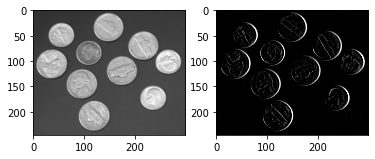

In [145]:
image = cv2.imread("coins.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(1,2)
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
h = np.array([[-1, -1, -1],[1, -2, 1],[1, 1, 1]])
h = h.transpose()
grad = signal.convolve2d(image_gray, h, boundary='symm', mode='same')
ax[1].imshow(grad, cmap='gray', vmin=0, vmax=255)
plt.show()